---
## **Test the High Dimensional SVM Classifier**
---

<font size="2">Eudald Sangenis  
Creation: 7/13/2022  
Last Update: 7/13/2022  

The objective of this file is to test the High Dimensional SVM classifier:  

Parameters of the trained High Dimensional Dataset:  
- 6 magnitude signals  
- timpe/sample window 

Once this classifier is tested the next step is to verify the navigation solution.</font>

---
## **<font size="5">1. Libraries</font>**
---

In [83]:
import os
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler

# Get the current working directory
current_directory = os.getcwd()

---
## **<font size="5">2. Parameters to modify</font>**
---

<font size="2">Boolean variable:
* True: Predict the test datasets
* False: Import already a done prediction</font>

In [84]:
prediction = True

<font size="2">Path High Dimensional Datasets to test the classifier:</font>

In [85]:
type_dataset = 'test'       # train, test
data_dataset = '2022_08_01' # 2022_03_17, 2022_04_25, 2022_07_27, 2022_08_01
bias_dataset = True         # True (no Bias), False (Bias).
# num_df_used_to_train = 4    # 2 (2022_03_17 & 2022_04_25), 3 (2022_07_27 or 2022_08_01)
num_window = 400            # 50, 100, 200, 400

In [86]:
# Folder to read the labeled and HD datasets:
dataset_path = current_directory+'\\HD_datasets\\'+data_dataset+'\\'

<font size="2">Number components of PCA</font>

In [87]:
num_components = 6

<font size="2">Path to the High Dimensional Classifier:</font>

In [88]:
# Folder classifier:
folder_clf = current_directory+'\\W'+str(num_window)+'_Results\\'
# Classifier Name:
name_clf = str(num_window)+'HD_6sig_pca'+str(num_components)+'_no_bias_balanced_clf.sav'

if prediction == True:
    support = pickle.load(open(folder_clf + name_clf, 'rb'))    # read clf model
    print('Classifier Loaded!')

Classifier Loaded!


<font size="2">Path to the predicted labels dataset:</font>

In [ ]:
folder_label_predicted = folder_clf
l_predicted_name = data_dataset + '_HD'+str(num_window)+'_6sig_pca'+str(num_components)+'_exp_Y_predicted'

<font size="2">Path to where to save the confusion matrix:</font>

In [ ]:
folder_cfm = folder_clf+'\\CFM_PCA_'+str(num_components)+'\\'

---
## **<font size="5">3. Load Trained Model Dataset:</font>**
---

In [ ]:
scaler_model = pickle.load(open(folder_clf+str(num_window)+'HD_6sig_pca'+str(num_components)+'_scaler.pkl','rb'))

---
## **<font size="5">3. Load Test Dataset:</font>**
---

In [95]:
print('Reading dataset ' + data_dataset + ' ...')
# Load the HD dataset
if bias_dataset == False: df = pd.read_csv(dataset_path + 'HD_'+str(num_window)+'_6sig_'+type_dataset+'.csv')
if bias_dataset == True: df = pd.read_csv(dataset_path + 'HD_'+str(num_window)+'_6sig_'+type_dataset+'_no_Bias.csv')
print('Reading done!')

df = df.drop(['Unnamed: 0'], axis=1)

print('Shapes '+data_dataset+': ')
print(df.shape)

Reading dataset 2022_08_01 ...
Reading done!
Shapes 2022_08_01: 
(308554, 2407)


In [96]:
print('Test dataset:')
df.head(2)

Test dataset:


,acc1_t400,acc2_t400,acc3_t400,gyro1_t400,gyro2_t400,gyro3_t400,acc1_t399,acc2_t399,acc3_t399,gyro1_t399,...,gyro1_t1,gyro2_t1,gyro3_t1,acc1_t0,acc2_t0,acc3_t0,gyro1_t0,gyro2_t0,gyro3_t0,label
0,-0.007497,-0.007911,-0.007815,-0.002473,0.005067,0.004034,-0.006129,-0.005758,-0.007927,-0.003435,...,-0.008360,-0.048492,-0.007279,-0.007497,-0.005338,-0.000724,-0.009369,-0.048241,-0.004562,ZUPT
1,-0.006129,-0.005758,-0.007927,-0.003435,0.006913,0.004834,-0.008057,-0.003649,-0.011993,-0.001400,...,-0.009369,-0.048241,-0.004562,-0.000787,-0.001213,-0.004791,-0.010449,-0.051190,-0.004535,ZUPT


In [97]:
X = df.iloc[:, :-1]
Y = df['label']

In [98]:
Y = Y.replace(['ZUPT','ZUPT_walk_60','ZUPT_walk_90',
               'ZUPT_jogg_120','ZUPT_run_150','ZUPT_sprint_180',
               'ZUPT_walk_b_60','ZUPT_walk_b_90','ZUPT_slide_right',
               'ZUPT_slide_left','walk_60','walk_90','jogg_120','run_150',
               'sprint_180','walk_b_60','walk_b_90','slide_right','slide_left'],
               [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]).to_numpy()

---
## **<font size="5">4. Normalize data:</font>**
---

In [99]:
X_norm


,acc1_t400,acc2_t400,acc3_t400,gyro1_t400,gyro2_t400,gyro3_t400,acc1_t399,acc2_t399,acc3_t399,gyro1_t399,...,acc3_t1,gyro1_t1,gyro2_t1,gyro3_t1,acc1_t0,acc2_t0,acc3_t0,gyro1_t0,gyro2_t0,gyro3_t0
0,0.164212,0.036298,0.125353,0.005158,0.012202,0.046195,0.165230,0.038340,0.125259,0.004583,...,0.132230,0.001646,-0.004810,0.037641,0.164214,0.038698,0.131304,0.001043,-0.004731,0.039696
1,0.165230,0.038340,0.125259,0.004583,0.012788,0.046800,0.163795,0.040341,0.121847,0.005798,...,0.131304,0.001043,-0.004731,0.039696,0.169209,0.042613,0.127891,0.000398,-0.005667,0.039716
2,0.163795,0.040342,0.121847,0.005798,0.013146,0.046274,0.162593,0.039105,0.122281,0.006307,...,0.127891,0.000398,-0.005667,0.039716,0.169216,0.041815,0.132660,-0.000194,-0.006398,0.038166
3,0.162593,0.039106,0.122281,0.006307,0.012627,0.045870,0.161483,0.041342,0.118710,0.006675,...,0.132660,-0.000194,-0.006398,0.038166,0.165949,0.041602,0.130414,0.000877,-0.005435,0.038008
4,0.161483,0.041342,0.118710,0.006675,0.013015,0.045831,0.159970,0.043123,0.124137,0.006380,...,0.130414,0.000877,-0.005435,0.038008,0.166210,0.037870,0.123884,-0.001102,-0.005006,0.038376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308549,0.160046,0.047896,0.132444,0.005167,0.006944,0.040321,0.157544,0.046647,0.133853,0.003857,...,0.125169,-0.001037,0.013200,0.042111,0.150923,0.063086,0.128858,-0.000141,0.013662,0.042744
308550,0.157544,0.046647,0.133853,0.003857,0.006720,0.040325,0.159570,0.045952,0.131363,0.002699,...,0.128858,-0.000141,0.013662,0.042744,0.150964,0.063027,0.128909,0.000190,0.014055,0.042584
308551,0.159570,0.045952,0.131363,0.002699,0.006851,0.040128,0.161455,0.044699,0.130766,0.002670,...,0.128909,0.000190,0.014055,0.042584,0.153605,0.065107,0.128226,0.001505,0.014217,0.043389
308552,0.161455,0.044699,0.130766,0.002670,0.006801,0.040088,0.158978,0.044997,0.133275,0.003424,...,0.128226,0.001505,0.014217,0.043389,0.155244,0.065652,0.128450,0.002135,0.013899,0.043911


In [ ]:
## STANDARIZE DATA
X_norm = scaler_model.transform(X)  # transform the new datset
X_norm = pd.DataFrame(X_norm, columns = df.columns[0:-1])
X_norm.head(2)

,acc1_t400,acc2_t400,acc3_t400,gyro1_t400,gyro2_t400,gyro3_t400,acc1_t399,acc2_t399,acc3_t399,gyro1_t399,...,acc3_t1,gyro1_t1,gyro2_t1,gyro3_t1,acc1_t0,acc2_t0,acc3_t0,gyro1_t0,gyro2_t0,gyro3_t0
0,0.164212,0.036298,0.125353,0.005158,0.012202,0.046195,0.165230,0.038340,0.125259,0.004583,...,0.132230,0.001646,-0.004810,0.037641,0.164214,0.038698,0.131304,0.001043,-0.004731,0.039696
1,0.165230,0.038340,0.125259,0.004583,0.012788,0.046800,0.163795,0.040341,0.121847,0.005798,...,0.131304,0.001043,-0.004731,0.039696,0.169209,0.042613,0.127891,0.000398,-0.005667,0.039716


---
## **<font size="5">5. PCA:</font>**
---

In [ ]:
pca_acc_x = pickle.load(open(folder_clf+str(num_window)+'HD_6sig_pca'+str(num_components)+'_PCA_acc_x.pkl','rb'))
pca_acc_y = pickle.load(open(folder_clf+str(num_window)+'HD_6sig_pca'+str(num_components)+'_PCA_acc_y.pkl','rb'))
pca_acc_z = pickle.load(open(folder_clf+str(num_window)+'HD_6sig_pca'+str(num_components)+'_PCA_acc_z.pkl','rb'))
pca_gyr_x = pickle.load(open(folder_clf+str(num_window)+'HD_6sig_pca'+str(num_components)+'_PCA_gyr_x.pkl','rb'))
pca_gyr_y = pickle.load(open(folder_clf+str(num_window)+'HD_6sig_pca'+str(num_components)+'_PCA_gyr_y.pkl','rb'))
pca_gyr_z = pickle.load(open(folder_clf+str(num_window)+'HD_6sig_pca'+str(num_components)+'_PCA_gyr_z.pkl','rb'))

In [102]:
# Project data to its dimensional reduction space
X_projected_acc_x = pca_acc_x.transform(X_norm.iloc[:,0::6])
print('The shape of the Linear Acceleration X projected training data is:' + str(X_projected_acc_x.shape))
X_projected_acc_y = pca_acc_y.transform(X_norm.iloc[:,1::6])
print('The shape of the Linear Acceleration Y projected training data is:' + str(X_projected_acc_y.shape))
X_projected_acc_z = pca_acc_z.transform(X_norm.iloc[:,2::6])
print('The shape of the Linear Acceleration Z projected training data is:' + str(X_projected_acc_z.shape))

X_projected_gyr_x = pca_gyr_x.transform(X_norm.iloc[:,3::6])
print('The shape of the Angular Velocity X projected training data is:' + str(X_projected_gyr_x.shape))
X_projected_gyr_y = pca_gyr_y.transform(X_norm.iloc[:,4::6])
print('The shape of the Angular Velocity Y projected training data is:' + str(X_projected_gyr_y.shape))
X_projected_gyr_z = pca_gyr_z.transform(X_norm.iloc[:,5::6])
print('The shape of the Angular Velocity Z projected training data is:' + str(X_projected_gyr_z.shape))

# Name of the columns of the pca dataset
colnames = []
for i in range(1,6*num_components+1):
    colnames = np.concatenate((colnames, [f'comp_{i}']))
colnames

X_projected = pd.concat([pd.DataFrame(X_projected_acc_x),pd.DataFrame(X_projected_acc_y),pd.DataFrame(X_projected_acc_z), pd.DataFrame(X_projected_gyr_x), pd.DataFrame(X_projected_gyr_y), pd.DataFrame(X_projected_gyr_z)], axis = 1)
X_projected.columns = colnames

The shape of the Linear Acceleration X projected training data is:(308554, 6)
The shape of the Linear Acceleration Y projected training data is:(308554, 6)
The shape of the Linear Acceleration Z projected training data is:(308554, 6)
The shape of the Angular Velocity X projected training data is:(308554, 6)
The shape of the Angular Velocity Y projected training data is:(308554, 6)
The shape of the Angular Velocity Z projected training data is:(308554, 6)


In [103]:
X_projected['label'] = Y
print('The projected test data in the number of components is:')
X_projected

The projected test data in the number of components is:


,comp_1,comp_2,comp_3,comp_4,comp_5,comp_6,comp_7,comp_8,comp_9,comp_10,...,comp_28,comp_29,comp_30,comp_31,comp_32,comp_33,comp_34,comp_35,comp_36,label
0,-3.062989,-0.013645,-1.394834,0.029161,-0.386577,-0.021318,-0.015308,0.186050,-0.006215,-0.263442,...,0.060708,-0.035897,-0.043183,0.091011,0.040076,-0.084283,0.337983,-0.698694,0.002394,0
1,-3.063107,-0.012970,-1.395331,0.028669,-0.385982,-0.019587,-0.015411,0.185951,-0.004857,-0.263406,...,0.062514,-0.037625,-0.043588,0.091549,0.039609,-0.084601,0.337097,-0.698645,0.001967,0
2,-3.063218,-0.012341,-1.395795,0.028218,-0.385399,-0.017772,-0.015557,0.186003,-0.003560,-0.263473,...,0.064302,-0.039318,-0.043890,0.092053,0.039104,-0.084952,0.336350,-0.698580,0.001626,0
3,-3.063319,-0.011505,-1.396181,0.027507,-0.384783,-0.016081,-0.015759,0.186172,-0.002338,-0.263614,...,0.065990,-0.041081,-0.044175,0.092548,0.038568,-0.085326,0.335559,-0.698530,0.001353,0
4,-3.063417,-0.010625,-1.396637,0.026725,-0.384270,-0.014391,-0.015808,0.186477,-0.000929,-0.263848,...,0.067655,-0.042933,-0.044359,0.093039,0.038024,-0.085692,0.334697,-0.698497,0.001103,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308549,-2.707053,0.015464,-1.350588,-0.087487,-0.394752,-0.012880,-0.039989,0.228412,-0.064894,-0.272982,...,0.037198,-0.102136,0.000251,0.051162,-0.046315,0.039005,0.317555,-0.677557,-0.013201,0
308550,-2.706899,0.014624,-1.349186,-0.088250,-0.396029,-0.012772,-0.040662,0.227819,-0.065093,-0.273860,...,0.033536,-0.102100,-0.000649,0.050316,-0.045873,0.038997,0.317611,-0.677928,-0.013792,0
308551,-2.706765,0.013778,-1.348002,-0.088947,-0.397519,-0.012630,-0.041367,0.227073,-0.065295,-0.274601,...,0.029849,-0.102040,-0.001549,0.049489,-0.045386,0.039028,0.317612,-0.678323,-0.014427,0
308552,-2.706637,0.012768,-1.346779,-0.089387,-0.398983,-0.012323,-0.042074,0.226277,-0.065467,-0.275299,...,0.026146,-0.101907,-0.002440,0.048680,-0.044869,0.039078,0.317564,-0.678742,-0.015072,0


---
## **<font size="5">6. Prediction Model</font>**
---

In [104]:
X = X_projected.iloc[:,:-1]

In [105]:
Y = X_projected.iloc[:,-1]

In [106]:
if prediction == True:
    print('Predicting...')
    Y_predicted = support.predict(X)
    print('Prediction done!')
    Y_predicted_df = pd.DataFrame(Y_predicted, columns = ['predicted_l'])
    Y_predicted_df.to_csv(folder_label_predicted + l_predicted_name)
    Y_predicted = pd.read_csv(folder_label_predicted + l_predicted_name)
else:
    Y_predicted = pd.read_csv(folder_label_predicted + l_predicted_name)
    print('L Predicted Loaded!')

Predicting...
Prediction done!


---
## **<font size="5">7. Prediction Results</font>**
---

---
### **<font size="3">7.0. Info</font>**
---

In [107]:
Y_predicted = Y_predicted.drop(columns=['Unnamed: 0'])
Y_predicted = np.transpose(Y_predicted.to_numpy().flatten())
print(Y), print(Y_predicted)
print(len(Y)), print(len(Y_predicted))
print(np.isnan(np.sum(Y))), print(np.isnan(np.sum(Y_predicted)))
print(np.where(np.isnan(Y)))
print(type(Y)), print(type(Y_predicted))

0         0
1         0
2         0
3         0
4         0
         ..
308549    0
308550    0
308551    0
308552    0
308553    0
Name: label, Length: 308554, dtype: int64
[0 0 0 ... 0 0 0]
308554
308554
False
False
(array([], dtype=int64),)
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


(None, None)

---
### **<font size="3">7.1. Accuracy</font>**
---

In [108]:
r2score_svm = 100*r2_score(Y, Y_predicted)
print('The r2score of the SVM is: {} %'.format(r2score_svm))

acc_svm = 100*accuracy_score(Y, Y_predicted)
print('The accuracy of the SVM is: {} %'.format(acc_svm))

The r2score of the SVM is: 73.17514622630382 %
The accuracy of the SVM is: 82.97186229962989 %


---
### **<font size="3">7.2. Location of support vectors</font>**
---

In [109]:
print('Location of the support vectors: ')
print(pd.DataFrame(support.support_vectors_))

Location of the support vectors: 
              0         1         2         3         4         5          6   \
0      -3.058710  0.007206 -1.431618 -0.001017 -0.433304 -0.002208  -0.001425   
1      -3.071807 -0.000620 -1.439857  0.004927 -0.432102 -0.004215  -0.002270   
2      -3.027527 -0.007359 -1.419210 -0.001153 -0.432586  0.010121  -0.009355   
3      -3.167917  0.007050 -1.486710 -0.000513 -0.446352 -0.000236   0.035306   
4      -2.631539 -0.021837 -1.208487  0.014672 -0.373964 -0.004089   0.004899   
...          ...       ...       ...       ...       ...       ...        ...   
41714  -1.955374 -0.731203 -0.420142 -0.151361  0.390210  0.539016   1.261967   
41715  10.149003 -4.352005 -2.124402 -1.887772  0.027122  2.344003   4.482631   
41716  -2.801965 -0.135294 -1.626802  0.377438 -0.288914 -0.687699   5.240552   
41717   1.250197  1.228831  0.284527  0.294368 -1.055885 -0.144654   0.278557   
41718   0.630252  0.920312  0.085738  2.794437 -0.433286 -4.172483 -17.3484

---
### **<font size="3">7.3. Number of support vectors for each class</font>**
---

In [110]:
print('Number of support vectors for each class:')
print(support.n_support_)

Number of support vectors for each class:
[4366 3823 2560  921  609  360 4365 2095 1114  693 2436 2482 2014 2129
 3309 2481 2960 1807 1195]


---
### **<font size="3">7.4. Check if it is well balanced (sum has to be 0)</font>**
---

In [111]:
print('SUM of the support vectors:')
print(support.dual_coef_.sum())

SUM of the support vectors:
1.837179297581315e-10


---
### **<font size="3">7.5. Classification report</font>**
---

In [112]:
print(classification_report(Y, Y_predicted))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84     27460
           1       0.77      0.92      0.84     18144
           2       0.87      0.84      0.85     13372
           3       0.74      0.89      0.80      2737
           4       0.76      0.83      0.79      1819
           5       0.63      0.97      0.76       754
           6       0.70      0.91      0.79     20075
           7       0.60      0.84      0.70      6655
           8       0.84      0.86      0.85      6910
           9       0.77      0.89      0.83      4368
          10       0.84      0.90      0.87     29054
          11       0.86      0.87      0.87     21007
          12       0.88      0.56      0.69     16820
          13       0.71      0.83      0.76     12916
          14       0.87      0.89      0.88      9323
          15       0.83      0.86      0.85     42446
          16       0.92      0.59      0.72     28864
          17       0.96    

---
### **<font size="3">7.6. Confusion matrix</font>**
---

In [113]:
X_test = pd.concat([pd.DataFrame(X_projected.iloc[:,:-1]), pd.DataFrame(Y), pd.DataFrame(Y_predicted)], axis = 1)

s = ['true_l','predicted_l']
X_test.columns = [*colnames, *s]

print('X test with true and predicted label:')
print(X_test)

X test with true and predicted label:
          comp_1    comp_2    comp_3    comp_4    comp_5    comp_6    comp_7  \
0      -3.062989 -0.013645 -1.394834  0.029161 -0.386577 -0.021318 -0.015308   
1      -3.063107 -0.012970 -1.395331  0.028669 -0.385982 -0.019587 -0.015411   
2      -3.063218 -0.012341 -1.395795  0.028218 -0.385399 -0.017772 -0.015557   
3      -3.063319 -0.011505 -1.396181  0.027507 -0.384783 -0.016081 -0.015759   
4      -3.063417 -0.010625 -1.396637  0.026725 -0.384270 -0.014391 -0.015808   
...          ...       ...       ...       ...       ...       ...       ...   
308549 -2.707053  0.015464 -1.350588 -0.087487 -0.394752 -0.012880 -0.039989   
308550 -2.706899  0.014624 -1.349186 -0.088250 -0.396029 -0.012772 -0.040662   
308551 -2.706765  0.013778 -1.348002 -0.088947 -0.397519 -0.012630 -0.041367   
308552 -2.706637  0.012768 -1.346779 -0.089387 -0.398983 -0.012323 -0.042074   
308553 -2.706516  0.011612 -1.345521 -0.089592 -0.400427 -0.011867 -0.042796   

 

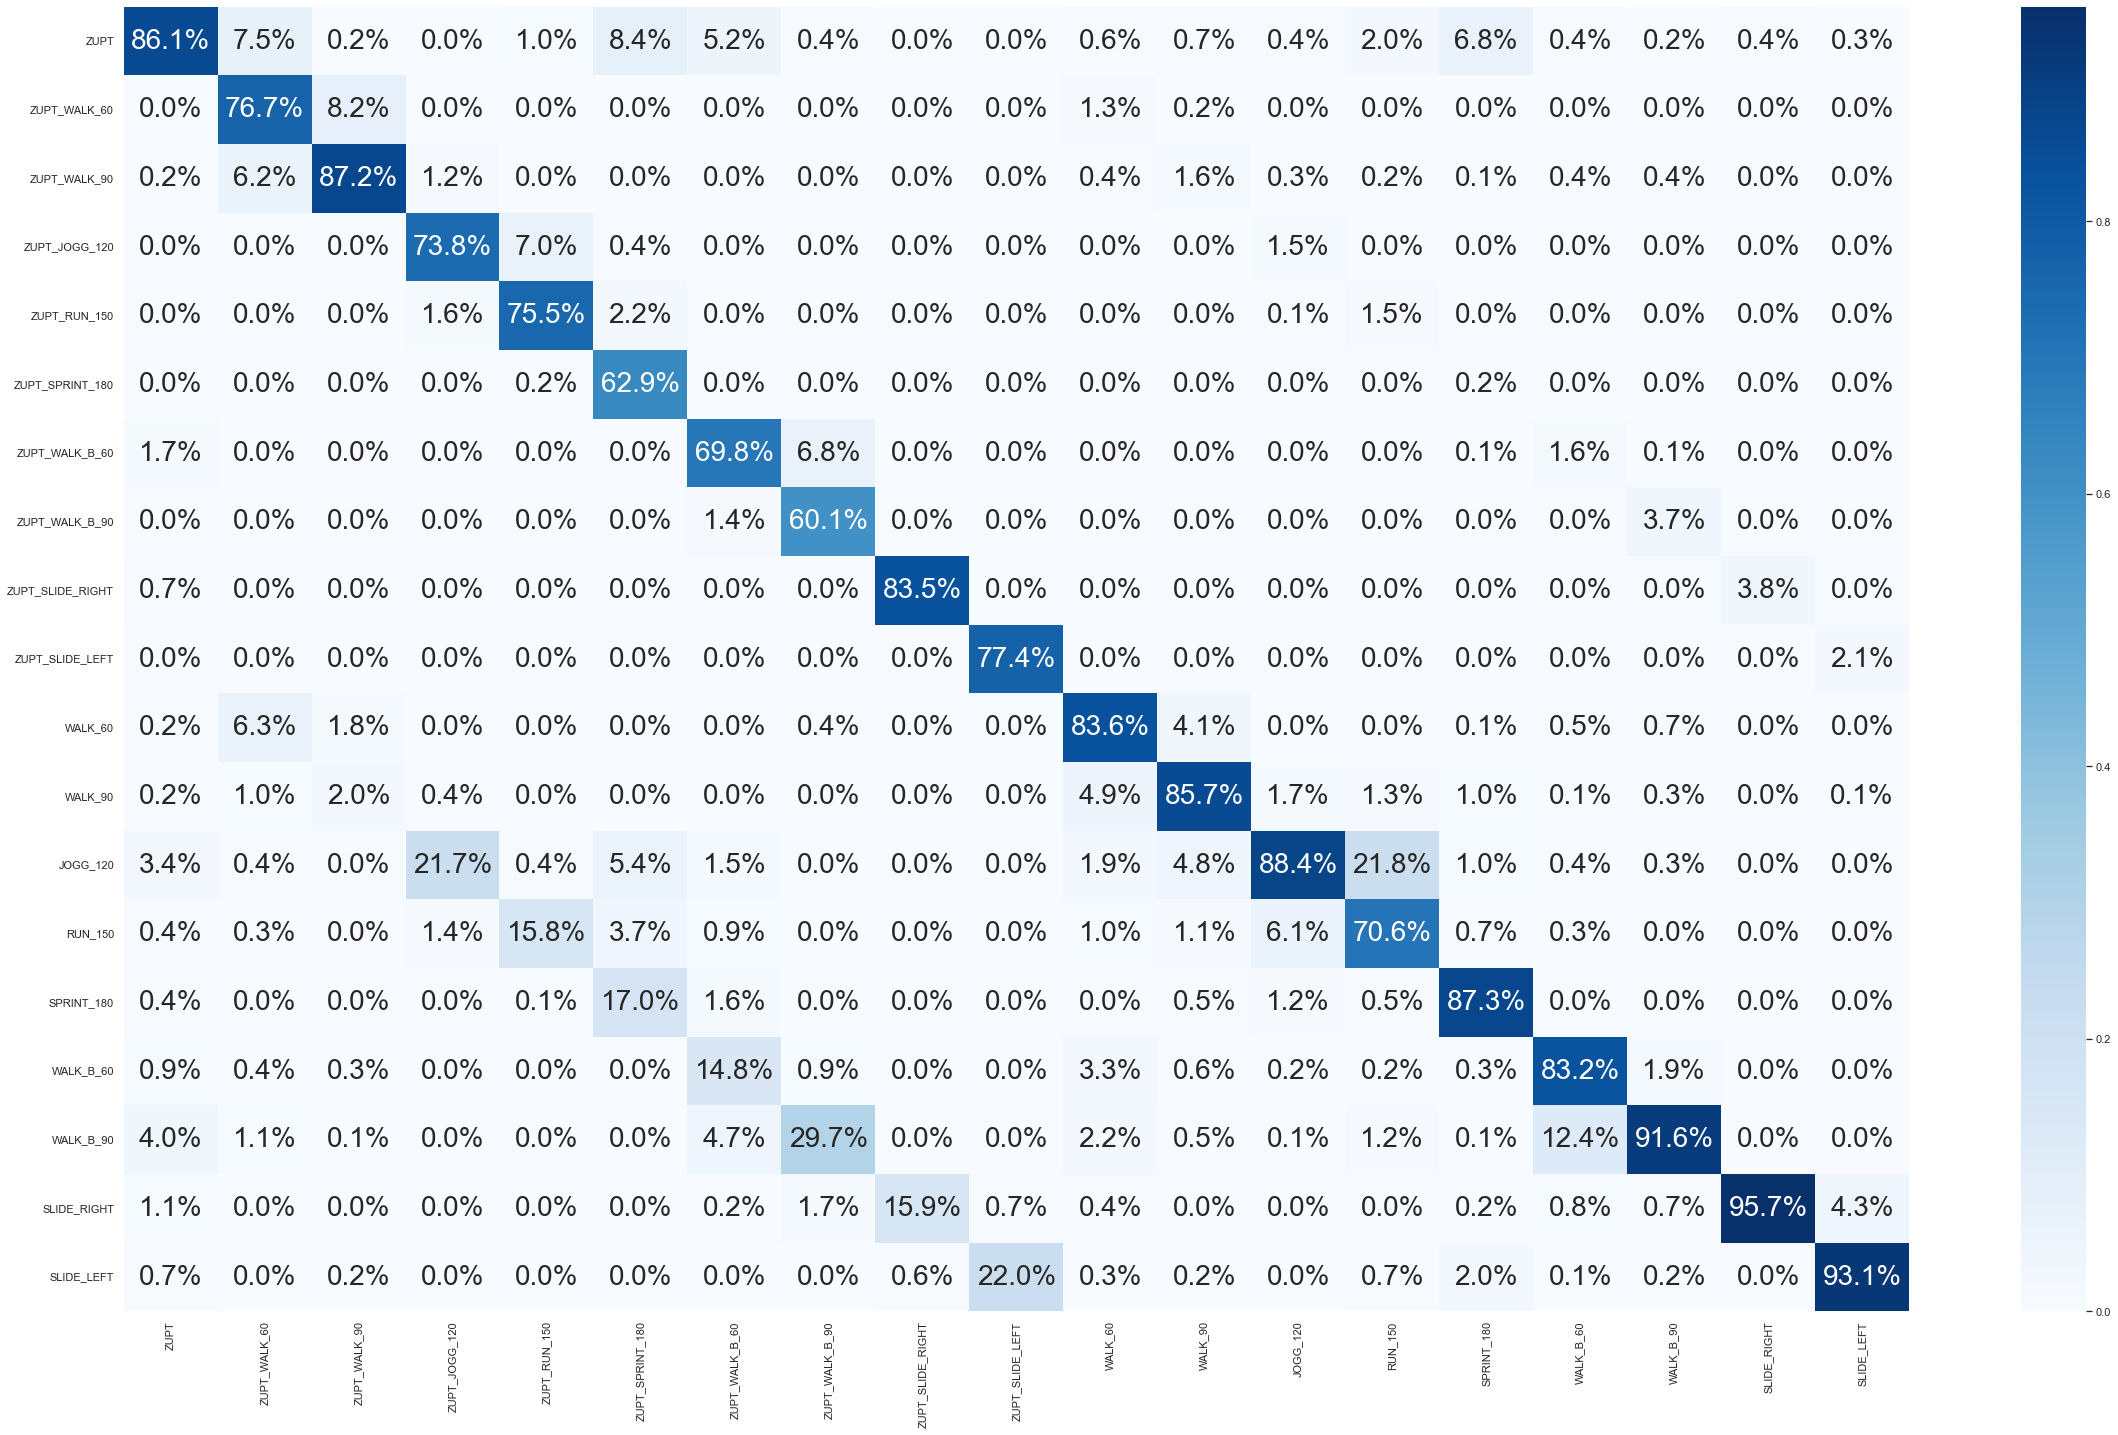

In [123]:
# Adjust font settings
plt.rcParams['text.usetex'] = False
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["xtick.labelsize"] = 28
plt.rcParams["ytick.labelsize"] = 28

X_test.loc[:,"true_l"] = X_test.loc[:,"true_l"].replace(
    [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],
    ['ZUPT','ZUPT_walk_60','ZUPT_walk_90',
     'ZUPT_jogg_120','ZUPT_run_150','ZUPT_sprint_180',
     'ZUPT_walk_b_60','ZUPT_walk_b_90','ZUPT_slide_right',
     'ZUPT_slide_left','walk_60','walk_90','jogg_120','run_150',
     'sprint_180','walk_b_60','walk_b_90','slide_right','slide_left'])

X_test.loc[:,"predicted_l"] = X_test.loc[:,"predicted_l"].replace(
    [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],
    ['ZUPT','ZUPT_walk_60','ZUPT_walk_90',
     'ZUPT_jogg_120','ZUPT_run_150','ZUPT_sprint_180',
     'ZUPT_walk_b_60','ZUPT_walk_b_90','ZUPT_slide_right',
     'ZUPT_slide_left','walk_60','walk_90','jogg_120','run_150',
     'sprint_180','walk_b_60','walk_b_90','slide_right','slide_left'])

labels = ['ZUPT','ZUPT_walk_60','ZUPT_walk_90',
          'ZUPT_jogg_120','ZUPT_run_150','ZUPT_sprint_180',
          'ZUPT_walk_b_60','ZUPT_walk_b_90','ZUPT_slide_right',
          'ZUPT_slide_left','walk_60','walk_90','jogg_120','run_150',
          'sprint_180','walk_b_60','walk_b_90','slide_right','slide_left']

CM_SVM = confusion_matrix(X_test.loc[:,"true_l"], X_test.loc[:,"predicted_l"], labels=labels)

CM_SVM = pd.DataFrame(CM_SVM, index=labels)

sns.set(rc = {'figure.figsize':(40,24)})
axis_labels = ['ZUPT','ZUPT_WALK_60','ZUPT_WALK_90','ZUPT_JOGG_120','ZUPT_RUN_150','ZUPT_SPRINT_180',
               'ZUPT_WALK_B_60','ZUPT_WALK_B_90','ZUPT_SLIDE_RIGHT','ZUPT_SLIDE_LEFT',
               'WALK_60','WALK_90','JOGG_120','RUN_150','SPRINT_180','WALK_B_60',
               'WALK_B_90','SLIDE_RIGHT','SLIDE_LEFT']



sns.heatmap(CM_SVM/np.sum(CM_SVM),annot=True, fmt='.1%', cmap='Blues', xticklabels=axis_labels, yticklabels=axis_labels, annot_kws={"size": 28})
plt.savefig(folder_cfm + 'cfm_'+data_dataset+'_'+str(round(acc_svm, 2))+'acc_pca'+str(num_components)+'_HD'+str(num_window)+'_6sig_paper.png') 
plt.show()

a = CM_SVM/np.sum(CM_SVM)
a.to_csv(folder_cfm + 'cfm_'+data_dataset+'_'+str(round(acc_svm, 2))+'acc_pca'+str(num_components)+'_HD'+str(num_window)+'_6sig_paper')

---
## **<font size="5">8. Prediction Results Just Activity Classes:</font>**
---

In [115]:
X_test_act = pd.DataFrame()

X_test_act.loc[:,"true_l"] = X_test.loc[:,"true_l"].replace(
    ['ZUPT','ZUPT_walk_60','ZUPT_walk_90',
     'ZUPT_jogg_120','ZUPT_run_150','ZUPT_sprint_180',
     'ZUPT_walk_b_60','ZUPT_walk_b_90','ZUPT_slide_right',
     'ZUPT_slide_left','walk_60','walk_90','jogg_120','run_150',
     'sprint_180','walk_b_60','walk_b_90','slide_right','slide_left'],
     [0,1,2,3,4,5,6,7,8,9,1,2,3,4,5,6,7,8,9])

X_test_act.loc[:,"predicted_l"] = X_test.loc[:,"predicted_l"].replace(
    ['ZUPT','ZUPT_walk_60','ZUPT_walk_90',
     'ZUPT_jogg_120','ZUPT_run_150','ZUPT_sprint_180',
     'ZUPT_walk_b_60','ZUPT_walk_b_90','ZUPT_slide_right',
     'ZUPT_slide_left','walk_60','walk_90','jogg_120','run_150',
     'sprint_180','walk_b_60','walk_b_90','slide_right','slide_left'],
     [0,1,2,3,4,5,6,7,8,9,1,2,3,4,5,6,7,8,9])

---
### **<font size="3">8.1. Accuracy</font>**
---

In [116]:
r2score_svm = 100*r2_score(X_test_act["true_l"], X_test_act["predicted_l"])
print('The r2score of the SVM is: {} %'.format(r2score_svm))

acc_svm_1 = 100*accuracy_score(X_test_act["true_l"], X_test_act["predicted_l"])
print('The accuracy of the SVM is: {} %'.format(acc_svm_1))

The r2score of the SVM is: 85.71546490841831 %
The accuracy of the SVM is: 88.00047965672135 %


---
### **<font size="3">8.2. Classification report</font>**
---

In [117]:
print(classification_report(X_test_act["true_l"], X_test_act["predicted_l"]))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84     27460
           1       0.84      0.94      0.89     47198
           2       0.88      0.88      0.88     34379
           3       0.91      0.65      0.76     19557
           4       0.74      0.86      0.80     14735
           5       0.87      0.92      0.89     10077
           6       0.85      0.95      0.90     62521
           7       0.93      0.74      0.82     35519
           8       1.00      0.92      0.96     29584
           9       0.96      0.97      0.97     27524

    accuracy                           0.88    308554
   macro avg       0.88      0.87      0.87    308554
weighted avg       0.89      0.88      0.88    308554



---
### **<font size="3">8.3. Confusion matrix</font>**
---

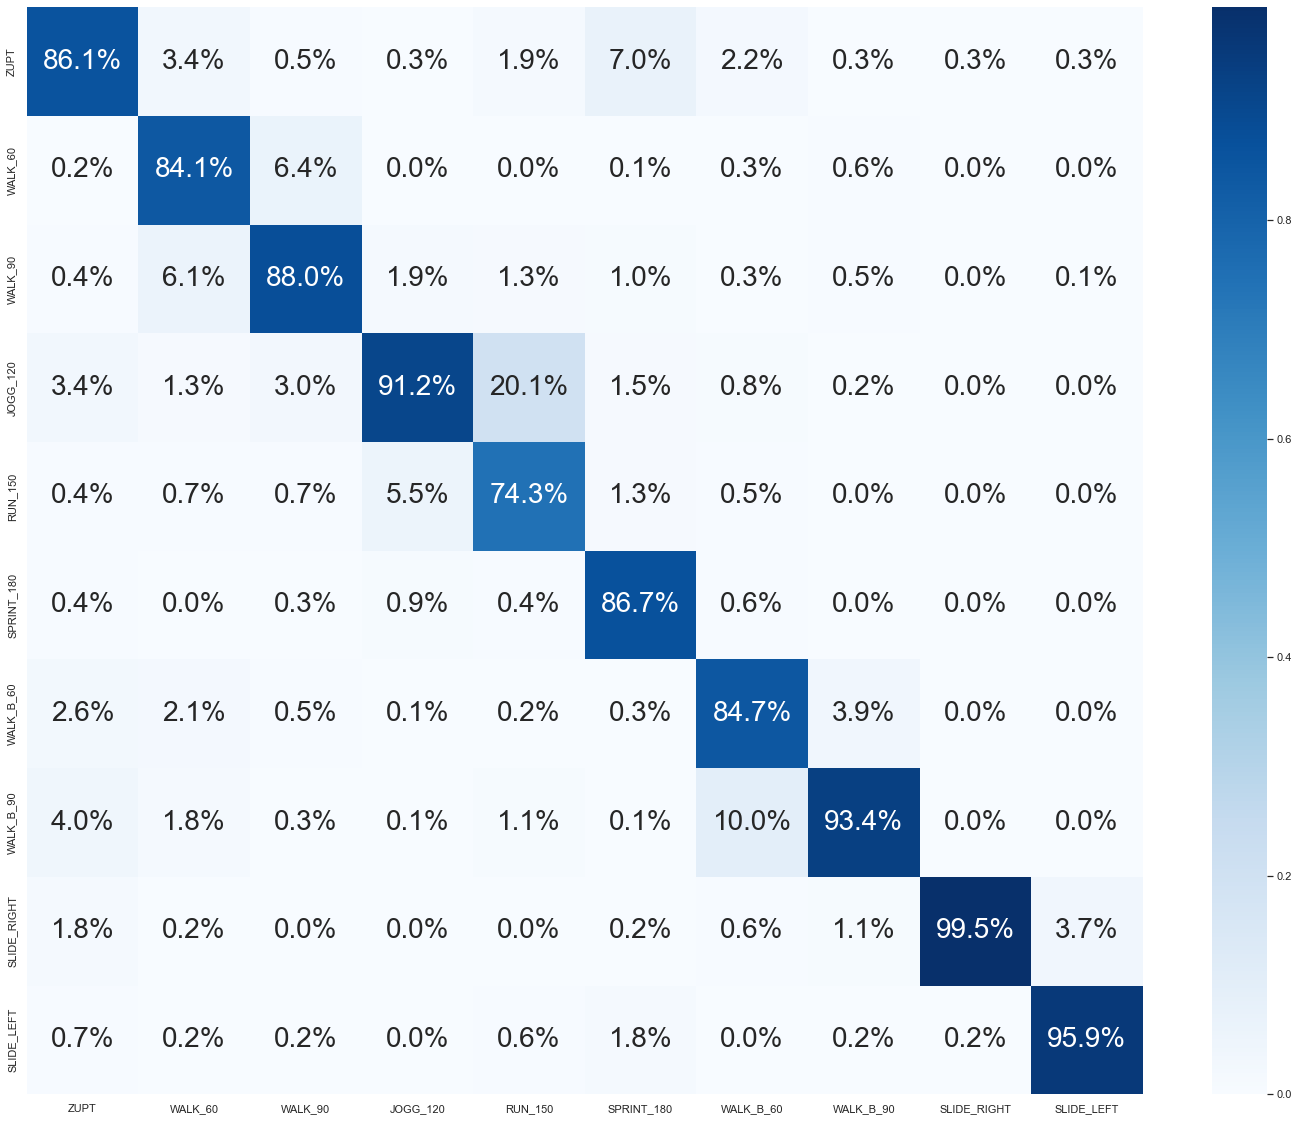

In [118]:
X_test_act.loc[:,"true_l"] = X_test_act.loc[:,"true_l"].replace(
    [0,1,2,3,4,5,6,7,8,9],
    ['ZUPT','walk_60','walk_90','jogg_120','run_150',
     'sprint_180','walk_b_60','walk_b_90','slide_right','slide_left'])

X_test_act.loc[:,"predicted_l"] = X_test_act.loc[:,"predicted_l"].replace(
    [0,1,2,3,4,5,6,7,8,9],
    ['ZUPT','walk_60','walk_90','jogg_120','run_150',
     'sprint_180','walk_b_60','walk_b_90','slide_right','slide_left'])

labels_act = ['ZUPT','walk_60','walk_90','jogg_120','run_150',
              'sprint_180','walk_b_60','walk_b_90','slide_right','slide_left']


CM_SVM = confusion_matrix(X_test_act.loc[:,"true_l"], X_test_act.loc[:,"predicted_l"], labels=labels_act)

CM_SVM = pd.DataFrame(CM_SVM, index=labels_act)

sns.set(rc = {'figure.figsize':(25,20)})
axis_labels = ['ZUPT','WALK_60','WALK_90','JOGG_120','RUN_150','SPRINT_180',
               'WALK_B_60','WALK_B_90','SLIDE_RIGHT','SLIDE_LEFT']

sns.heatmap(CM_SVM/np.sum(CM_SVM),annot=True, fmt='.1%', cmap='Blues', xticklabels=axis_labels, yticklabels=axis_labels, annot_kws={"size": 28})
plt.savefig(folder_cfm + 'cfm_'+data_dataset+'_'+str(round(acc_svm_1, 2))+'acc_pca'+str(num_components)+'_HD'+str(num_window)+'_6sig_v2_paper.png') 
plt.show()

---
## **<font size="5">8. Prediction Results Just Activity Classes unifying walk 60 & 90 and walk back:</font>**
---

In [119]:
X_test_act2 = pd.DataFrame()

X_test_act2.loc[:,"true_l"] = X_test_act.loc[:,"true_l"].replace(
    ['ZUPT','walk_60','walk_90','jogg_120','run_150','sprint_180','walk_b_60','walk_b_90','slide_right','slide_left'],
    [0,1,1,2,3,4,5,5,6,6])

X_test_act2.loc[:,"predicted_l"] = X_test_act.loc[:,"predicted_l"].replace(
    ['ZUPT','walk_60','walk_90','jogg_120','run_150','sprint_180','walk_b_60','walk_b_90','slide_right','slide_left'],
    [0,1,1,2,3,4,5,5,6,6])

X_test_act2

,true_l,predicted_l
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
308549,0,0
308550,0,0
308551,0,0
308552,0,0


In [120]:
r2score_svm = 100*r2_score(X_test_act2["true_l"], X_test_act2["predicted_l"])
print('The r2score of the SVM is: {} %'.format(r2score_svm))

acc_svm_2 = 100*accuracy_score(X_test_act2["true_l"], X_test_act2["predicted_l"])
print('The accuracy of the SVM is: {} %'.format(acc_svm_2))

The r2score of the SVM is: 85.21374961441262 %
The accuracy of the SVM is: 92.73190430200225 %


In [121]:
print(classification_report(X_test_act2["true_l"], X_test_act2["predicted_l"]))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84     27460
           1       0.92      0.98      0.95     81577
           2       0.91      0.65      0.76     19557
           3       0.74      0.86      0.80     14735
           4       0.87      0.92      0.89     10077
           5       0.95      0.96      0.96     98040
           6       1.00      0.96      0.98     57108

    accuracy                           0.93    308554
   macro avg       0.89      0.88      0.88    308554
weighted avg       0.93      0.93      0.93    308554



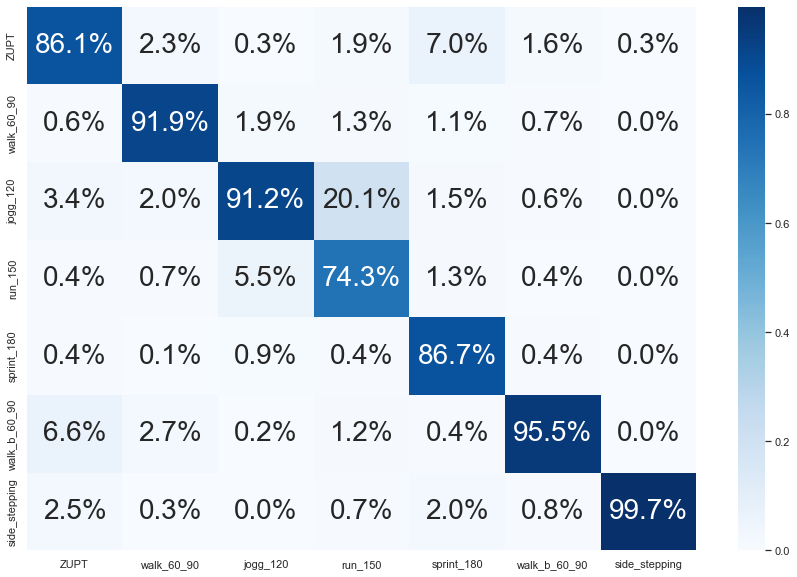

In [122]:
X_test_act2.loc[:,"true_l"] = X_test_act2.loc[:,"true_l"].replace(
    [0,1,2,3,4,5,6],
    ['ZUPT','walk_60_90','jogg_120','run_150',
     'sprint_180','walk_b_60_90','side_stepping'])

X_test_act2.loc[:,"predicted_l"] = X_test_act2.loc[:,"predicted_l"].replace(
    [0,1,2,3,4,5,6],
    ['ZUPT','walk_60_90','jogg_120','run_150',
     'sprint_180','walk_b_60_90','side_stepping'])

labels_act = ['ZUPT','walk_60_90','jogg_120','run_150',
              'sprint_180','walk_b_60_90','side_stepping']


CM_SVM = confusion_matrix(X_test_act2.loc[:,"true_l"], X_test_act2.loc[:,"predicted_l"], labels=labels_act)

CM_SVM = pd.DataFrame(CM_SVM, index=labels_act)

sns.set(rc = {'figure.figsize':(15,10)})
axis_labels = ['ZUPT','walk_60_90','jogg_120','run_150',
               'sprint_180','walk_b_60_90','side_stepping']

sns.heatmap(CM_SVM/np.sum(CM_SVM),annot=True, fmt='.1%', cmap='Blues', xticklabels=axis_labels, yticklabels=axis_labels, annot_kws={"size": 28})
plt.savefig(folder_cfm + 'cfm_'+data_dataset+'_'+str(round(acc_svm_2, 2))+'acc_pca'+str(num_components)+'_HD'+str(num_window)+'_6sig_3_paper.png') 
plt.show()